# Imports

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Reading in Dataset

In [7]:
df_details = pd.read_csv('games_details.csv', sep=",")
df_games = pd.read_csv('games.csv', sep=',')

In [8]:
df_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


# Checking Columns Definitions and Structure

In [9]:
df_games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.319500e+04,2.319500e+04,2.319500e+04,23195.000000,2.319500e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,2.319500e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23195.000000
mean,2.156394e+07,1.610613e+09,1.610613e+09,2010.844147,1.610613e+09,102.149117,0.459901,0.757874,0.355458,22.512253,43.174359,1.610613e+09,99.168254,0.448125,0.756188,0.348710,21.099974,41.850061,0.592326
std,5.451505e+06,8.649845e+00,8.664090e+00,4.829889,8.649845e+00,12.902191,0.056794,0.100397,0.114683,5.153124,6.597023,8.664090e+00,12.947992,0.055589,0.103148,0.112754,5.080440,6.495695,0.491413
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060059e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,93.000000,0.420000,0.696000,0.281000,19.000000,39.000000,1.610613e+09,90.000000,0.410000,0.692000,0.273000,18.000000,37.000000,0.000000
50%,2.110024e+07,1.610613e+09,1.610613e+09,2011.000000,1.610613e+09,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,1.610613e+09,99.000000,0.447000,0.762000,0.348000,21.000000,42.000000,1.000000
75%,2.160013e+07,1.610613e+09,1.610613e+09,2015.000000,1.610613e+09,111.000000,0.500000,0.826000,0.429000,26.000000,48.000000,1.610613e+09,108.000000,0.486000,0.828000,0.421000,24.000000,46.000000,1.000000
max,4.180041e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,47.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


In [10]:
df_games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [11]:
df_details.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

# Creating Turnover Parameters

In [24]:
#Creating Tota Turnover Parameter by Individual game and Team
df_to = df_details.groupby(['GAME_ID','TEAM_ID','TEAM_ABBREVIATION']).agg({'TO':'sum'}).reset_index().sort_values(by='GAME_ID')

In [35]:
#Seperating the games into their respective Seasons
df_season_games = df_games[['SEASON','GAME_ID']].drop_duplicates()

In [37]:
#Merge the two tables above to get TO Per season Per team 
df_final_to = pd.merge(df_season_games,df_to,how='left',left_on='GAME_ID', right_on='GAME_ID')

In [54]:
df_final_to.head()

,SEASON,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TO
0,2019,21900895,1.610613e+09,CHA,10.0
1,2019,21900895,1.610613e+09,MIL,16.0
2,2019,21900896,1.610613e+09,DAL,14.0
3,2019,21900896,1.610613e+09,MIN,13.0
4,2019,21900897,1.610613e+09,LAC,10.0


In [46]:
#Get Average of Turnovers by Season and Team
df_final_to_teams = df_final_to.groupby(['SEASON','TEAM_ABBREVIATION']).agg({'TO':'mean'}).reset_index()

### Average Per Season

In [64]:
df_avg_season = df_final_to.groupby(['SEASON']).agg({'TO':'mean'}).reset_index()
df_avg_season

,SEASON,TO
0,2003,14.277216
1,2004,13.931351
2,2005,14.017801
3,2006,14.824524
4,2007,13.735648
5,2008,13.668772
6,2009,13.764396
7,2010,13.838959
8,2011,13.954710
9,2012,14.123944


### Checking which team had the most average turnover from 2003-2019

In [48]:
df_final_to_teams.groupby(['TEAM_ABBREVIATION']).agg({'TO':'sum'}).sort_values(by='TO')

,TO
TEAM_ABBREVIATION,
NOK,26.674157
SEA,71.191813
NOP,97.090653
NOH,106.236660
BKN,116.483254
NJN,125.436537
OKC,173.079942
CHA,213.410371
DAL,218.596872


In [69]:

top_five_to_teams = ['PHX',
                     #'ATL',
                    # 'PHI',
                    # 'UTA',
                     'DEN',
                     "LAL"]

In [70]:
df_final_to_teams.query('TEAM_ABBREVIATION==@top_five_to_teams')

,SEASON,TEAM_ABBREVIATION,TO
5,2003,DEN,14.586207
11,2003,LAL,13.096154
21,2003,PHX,14.698795
35,2004,DEN,14.434783
41,2004,LAL,13.722892
51,2004,PHX,13.440000
65,2005,DEN,14.589474
71,2005,LAL,13.773196
81,2005,PHX,12.639640
95,2006,DEN,16.308511


## Visualizing Some Turn Over Plots

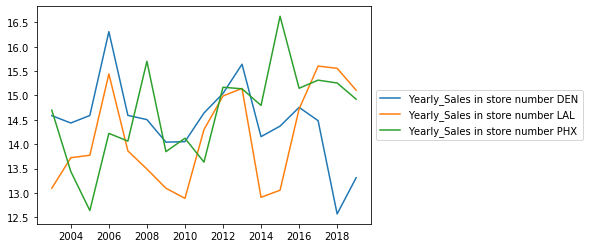

In [71]:
# Top Topturnover teams throughout the Year
for key, grp in df_final_to_teams.query('TEAM_ABBREVIATION==@top_five_to_teams').groupby(['TEAM_ABBREVIATION']):
    plt.plot(grp['SEASON'], grp['TO'], label = "Yearly_Sales in store number {}".format(key))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.show()

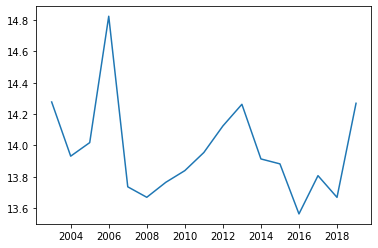

In [65]:

plt.plot(df_avg_season['SEASON'],df_avg_season['TO'])

### Lakers Turnover

In [76]:
df_lakers_to = df_final_to.query("TEAM_ABBREVIATION=='LAL' & SEASON =='2019'")

In [97]:
# Testing for normality

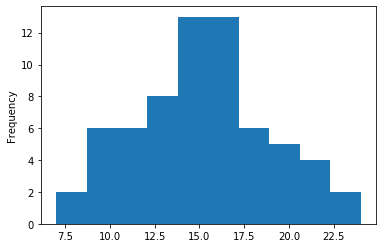

In [101]:
df_lakers_to['TO'].plot.hist()

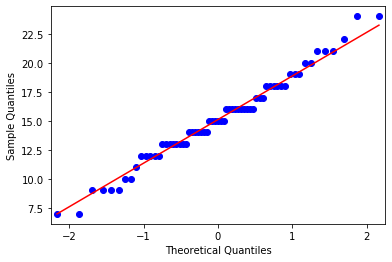

In [96]:
qqplot(df_lakers_to['TO'], line='s')
pyplot.show()

#### Shapiro-Wilk Test

In [100]:
stat, p = shapiro(df_lakers_to['TO'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p=0.522
Sample looks Gaussian (fail to reject H0)


### Established Normality for Turnovers - Lets Calculate some probabilities 

In [77]:
df_lakers_to['TO'].mean()

15.107692307692307

In [78]:
df_lakers_to['TO'].std()

3.7795629580476837

In [90]:
st.norm.cdf((21 - df_lakers_to['TO'].mean())/df_lakers_to['TO'].std())

0.9405008405483154

In [102]:
1 - st.norm.cdf((21 - df_lakers_to['TO'].mean())/df_lakers_to['TO'].std())

0.0594991594516846

In [85]:
df_lakers_to['TO'][df_lakers_to['TO'] >= 21]

245      24.0
441      21.0
1019     22.0
32197    21.0
32215    24.0
32247    21.0
Name: TO, dtype: float64

In [86]:
6/65

0.09230769230769231

# Houston Win_Pct_on_Threes

In [103]:
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [113]:
#Houstan Team ID =1610612745 Let's use that for df_games dataframe
team_id = df_details.query("TEAM_ABBREVIATION=='HOU'")
team_id = team_id.TEAM_ID.unique()

In [119]:
df_games_copy = df_games.query('HOME_TEAM_ID == @team_id or VISITOR_TEAM_ID == @team_id')

In [135]:
df_games_copy['Home'] = np.where(df_games_copy['HOME_TEAM_ID'] == int(team_id), 'Yes','No')

C:\Users\heyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
df_games_copy.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Home
12,2020-02-29,21900892,Final,1610612738,1610612745,2019,1610612738,110.0,0.390,0.760,...,54.0,1610612745,111.0,0.418,0.778,0.273,17.0,53.0,0,No
34,2020-02-26,21900870,Final,1610612745,1610612763,2019,1610612745,140.0,0.559,0.867,...,44.0,1610612763,112.0,0.398,0.619,0.333,28.0,49.0,1,Yes
49,2020-02-24,21900853,Final,1610612745,1610612752,2019,1610612745,123.0,0.500,0.677,...,38.0,1610612752,112.0,0.440,0.700,0.379,20.0,54.0,1,Yes


In [185]:
def label_home_threepct(row):
    if row['Home'] == 'Yes':
        return row['FG3_PCT_home']
    else:
        return row['FG3_PCT_away']
    
    
def label_win(row):
    if row['Home'] == 'Yes' and row['HOME_TEAM_WINS'] == 1:
        return 'Win'
    elif row['Home'] == 'No' and row['HOME_TEAM_WINS'] == 0:
        return 'Win'
    else:
        return 'Lose'

In [186]:
df_games_copy['Team_FG3_PCT'] = df_games_copy.apply(lambda row:label_home_threepct(row), 1)
df_games_copy['Team_Win'] = df_games_copy.apply(lambda row:label_win(row), 1)

C:\Users\heyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\heyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
houstan_games = df_games_copy[['HOME_TEAM_ID','VISITOR_TEAM_ID', 'SEASON','PTS_home','PTS_away','Home', 'Team_FG3_PCT', 'Team_Win']].reset_index()

In [204]:
houstan_games['Games_index'] = houstan_games.index

In [205]:
houstan_games

,index,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,PTS_away,Home,Team_FG3_PCT,Team_Win,Games_index
0,12,1610612738,1610612745,2019,110.0,111.0,No,0.273,Win,0
1,34,1610612745,1610612763,2019,140.0,112.0,Yes,0.460,Win,1
2,49,1610612745,1610612752,2019,123.0,112.0,Yes,0.333,Win,2
3,66,1610612762,1610612745,2019,110.0,120.0,No,0.417,Win,3
4,81,1610612744,1610612745,2019,105.0,135.0,No,0.510,Win,4
...,...,...,...,...,...,...,...,...,...,...
1564,23124,1610612745,1610612744,2014,90.0,83.0,Yes,0.320,Win,1564
1565,23151,1610612740,1610612745,2014,117.0,98.0,No,0.444,Lose,1565
1566,23156,1610612745,1610612756,2014,95.0,92.0,Yes,0.167,Win,1566
1567,23174,1610612745,1610612763,2014,113.0,93.0,Yes,0.467,Win,1567


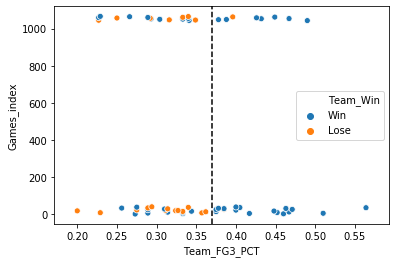

In [231]:
%matplotlib inline
plt1 = sns.scatterplot(data = houstan_games[houstan_games['SEASON'] == 2019],
                x = 'Team_FG3_PCT', y= 'Games_index', hue = 'Team_Win')
plt1.axvline(x=0.37,color='k', linestyle='--')

### <font color = 'Red'>Confirmed that the Rockets lost only one game when they shot over 0.37 in threes </font>